<a href="https://colab.research.google.com/github/lucasoliveira13/Digital_Image_Processing/blob/main/lista_5_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Processamento de Imagens
**Grupo: Lucas Matheus Oliveira e Guilherme Vilarim**

###Imports

In [ ]:
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import os
from collections import Counter
from skimage.metrics import structural_similarity as ssim

drive.mount('/content/drive')
path = '/content/drive/MyDrive/PDI/atividade_5'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Criando os métodos utilizados para a primeira questão

In [ ]:
def adicionar_ruido_impulso_polar(imagem, probabilidade):
    altura, largura = imagem.shape
    imagem_ruidosa = np.copy(imagem)

    for i in range(altura):
        for j in range(largura):
            ruido = np.random.random()
            if ruido < probabilidade:
                imagem_ruidosa[i, j] = 0

    return imagem_ruidosa

In [ ]:
def adicionar_ruido_impulsivo_bipolar(imagem, probabilidade):
    altura, largura = imagem.shape
    imagem_ruidosa = np.copy(imagem)

    for i in range(altura):
        for j in range(largura):
            ruido = np.random.random()

            if ruido < probabilidade:
                imagem_ruidosa[i, j] = np.random.choice([0, 255])

    return imagem_ruidosa

In [ ]:
def adicionar_ruido_gaussiano(imagem, media, desvio_padrao):
    altura, largura = imagem.shape
    ruido = np.random.normal(media, desvio_padrao, (altura, largura))
    imagem_ruidosa = np.clip(imagem + ruido, 0, 255).astype(np.uint8)
    return imagem_ruidosa

In [ ]:
def calculate_psnr(imagem_limpa, imagem_ruidosa):
    imagem_limpa = imagem_limpa.astype(np.float64)
    imagem_ruidosa = imagem_ruidosa.astype(np.float64)

    mse = np.mean((imagem_limpa - imagem_ruidosa) ** 2)

    if mse == 0:
        return "As imagens são idênticas"

    #PSNR
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)

    return psnr

###Plots

In [ ]:
def plot_imagens_histogramas_3(imagem1, imagem2, imagem3, path_imagem, path_hist):
    fig, axes = plt.subplots(3, 2, figsize=(8, 9))

    # Plot da primeira imagem
    axes[0, 0].imshow(imagem1, cmap='gray')
    axes[0, 0].set_title('Imagem Original')
    axes[0, 0].axis('off')

    # Plot do histograma da primeira imagem
    hist1, bins1, _ = axes[0, 1].hist(imagem1.flatten(), bins=256, color='blue', alpha=0.7)
    axes[0, 1].set_title('Histograma da Imagem Original')
    axes[0, 1].set_xlim([0, 255])
    axes[0, 1].set_ylim([0, np.max(hist1)])

    # Plot da segunda imagem
    axes[1, 0].imshow(imagem2, cmap='gray')
    axes[1, 0].set_title('Resultado')
    axes[1, 0].axis('off')

    if 'image_1' in path_hist or 'image_2' in path_hist:
      hist2, bins2, _ = axes[1, 1].hist(imagem2.flatten(), bins=256, color='blue', alpha=0.7)
      axes[1, 1].set_title('Histograma do Resultado')
      axes[1, 1].set_xlim([0, 255])
      axes[1, 1].set_ylim([0, 1500])
    else:
      hist2, bins2, _ = axes[1, 1].hist(imagem2.flatten(), bins=256, color='blue', alpha=0.7)
      axes[1, 1].set_title('Histograma do Resultado')
      axes[1, 1].set_xlim([0, 255])
      axes[1, 1].set_ylim([0, np.max(hist2)])

    # Plot da terceira imagem
    axes[2, 0].imshow(imagem3, cmap='gray')
    axes[2, 0].set_title('Ruído')
    axes[2, 0].axis('off')

    dif = imagem1.astype(np.int16) - imagem2.astype(np.int16)

    if 'image_1' in path_hist or 'image_2' in path_hist:
      hist3, bins3, _ = axes[2, 1].hist(dif.flatten(), bins=256, color='red', alpha=0.7)
      axes[2, 1].set_title('Histograma do Ruído')
      axes[2, 1].set_xlim([-255, 255])
      axes[2, 1].set_ylim([0, 500])
    else:
      # Plot do histograma do ruído
      hist3, bins3, _ = axes[2, 1].hist(dif.flatten(), bins=256, color='red', alpha=0.7)
      axes[2, 1].set_title('Histograma do Ruído')
      axes[2, 1].set_xlim([-255, 255])
      axes[2, 1].set_ylim([0, np.max(hist3)])

    plt.imsave(path_imagem, imagem2, cmap='gray')
    plt.savefig(path_hist)

    plt.tight_layout()
    plt.show()


###Carregando imagens para a questão 1

In [ ]:
image_1 = plt.imread("/content/drive/MyDrive/PDI/atividade_5/images/image_1.jpg")
image_2 = plt.imread("/content/drive/MyDrive/PDI/atividade_5/images/image_2.jpg")
image_3 = plt.imread("/content/drive/MyDrive/PDI/atividade_5/images/image_3.jpg")

unipolar = adicionar_ruido_impulso_polar(image_1, 0.23)
bipolar = adicionar_ruido_impulsivo_bipolar(image_2,0.18)
gaussiano = adicionar_ruido_gaussiano(image_3,15, 10)

####Resultados

**Imagem_1:** Aplicamos o método `adicionar_ruido_impulso_polar()` com probabilidade **23%**.

O PSNR das imagens é de: 11.33561719741425
O SSIM entre as imagens é de: 0.07936305901318094


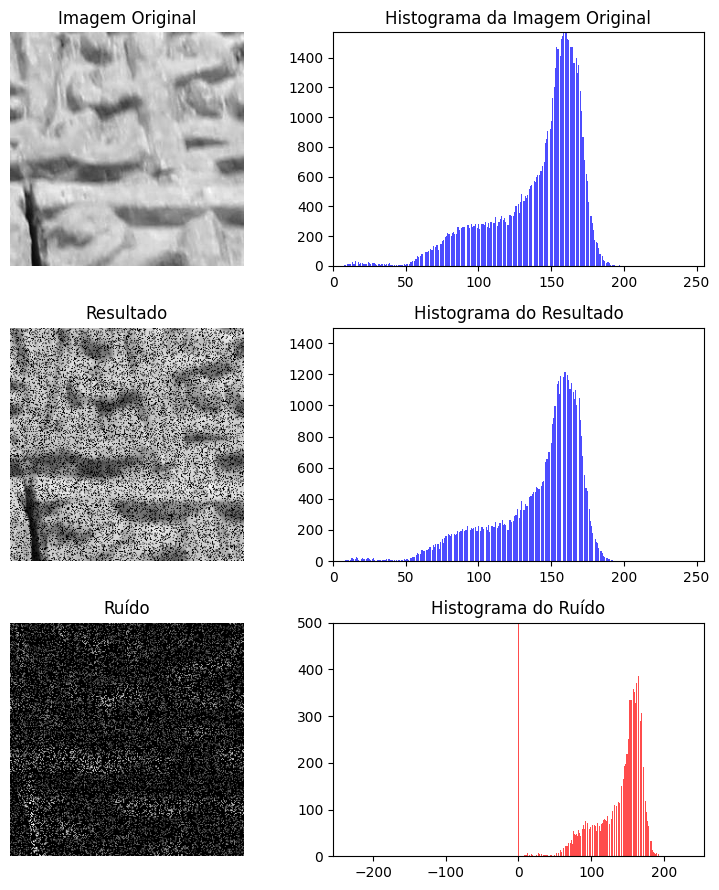

In [ ]:
path_image = "/content/drive/MyDrive/PDI/atividade_5/resultados/image_1.jpg"
path_hist = "/content/drive/MyDrive/PDI/atividade_5/resultados_hist/image_1.jpg"

resultado_ssim = ssim(image_1, unipolar)
psnr = calculate_psnr(image_1,unipolar)
print(f"O PSNR das imagens é de: {psnr}")
print(f"O SSIM entre as imagens é de: {resultado_ssim}")

noisy = unipolar - image_1

plot_imagens_histogramas_3(image_1,unipolar,noisy,path_image,path_hist)

**Imagem_2:** Aplicamos o método `adicionar_ruido_impulsivo_bipolar()` com probabilidade **18%**.

O PSNR das imagens é de: 13.099358128969145
O SSIM entre as imagens é de: 0.08249032862552143


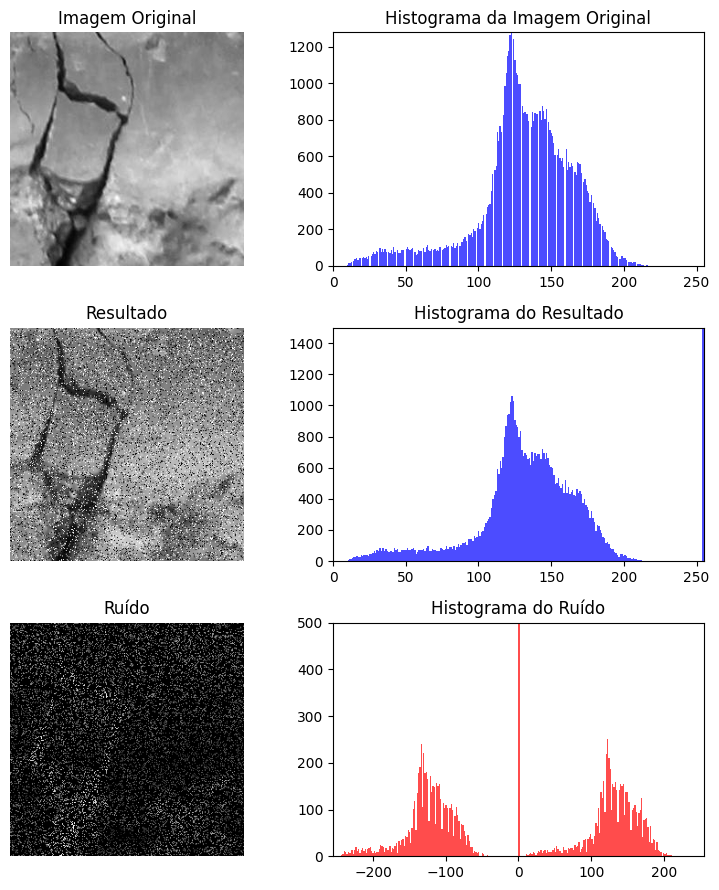

In [ ]:
path_image = "/content/drive/MyDrive/PDI/atividade_5/resultados/image_2.jpg"
path_hist = "/content/drive/MyDrive/PDI/atividade_5/resultados_hist/image_2.jpg"

resultado_ssim = ssim(image_2, bipolar)
psnr = calculate_psnr(image_2,bipolar)

print(f"O PSNR das imagens é de: {psnr}")
print(f"O SSIM entre as imagens é de: {resultado_ssim}")

noisy = bipolar - image_2

plot_imagens_histogramas_3(image_2,bipolar,noisy,path_image,path_hist)

**Imagem_3:** Aplicamos o método `adicionar_ruido_gaussiano()` com média **15** e desvio padrão **10**.

O PSNR das imagens é de: 23.316183335295577
O SSIM entre as imagens é de: 0.48422251176100817


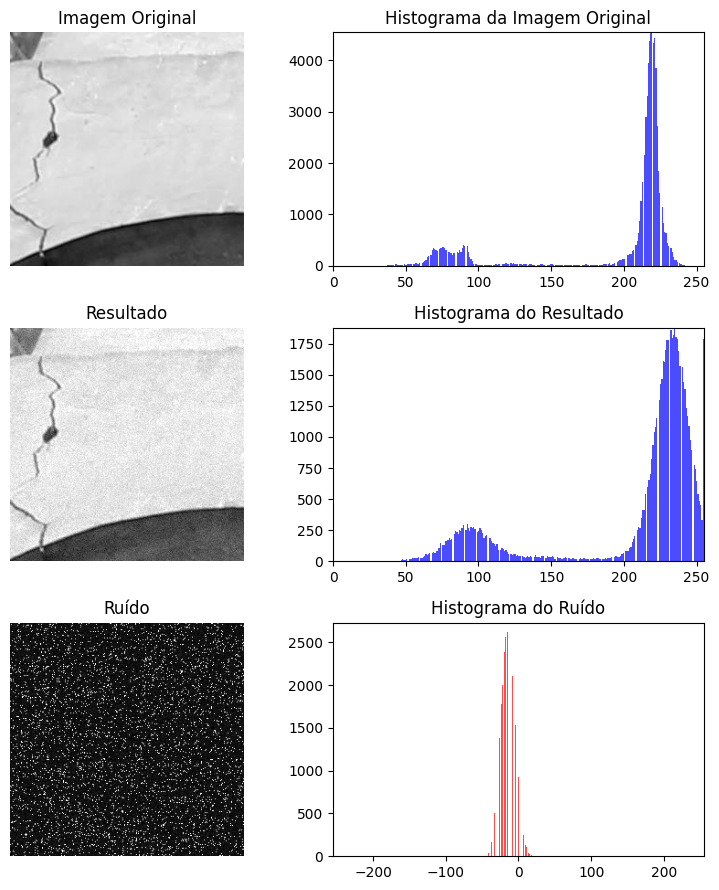

In [ ]:
path_image = "/content/drive/MyDrive/PDI/atividade_5/resultados/image_3.jpg"
path_hist = "/content/drive/MyDrive/PDI/atividade_5/resultados_hist/image_3.jpg"

resultado_ssim = ssim(image_3, gaussiano)
psnr = calculate_psnr(image_3,gaussiano)

print(f"O PSNR das imagens é de: {psnr}")
print(f"O SSIM entre as imagens é de: {resultado_ssim}")

noisy = gaussiano - image_3

plot_imagens_histogramas_3(image_3,gaussiano,noisy,path_image,path_hist)

###Criando os métodos utilizados para as questões 2 e 3

In [ ]:
def filtro_media(image, tamanho_janela):

    img_array = np.array(image)

    img_filtrada = np.zeros_like(img_array)

    tamanho = int((tamanho_janela - 1) / 2)

    for i in range(tamanho, img_array.shape[0] - tamanho):
        for j in range(tamanho, img_array.shape[1] - tamanho):
            janela = img_array[i - tamanho:i + tamanho + 1, j - tamanho:j + tamanho + 1]

            img_filtrada[i, j] = np.mean(janela)

    return img_filtrada

In [ ]:
def filtro_mediana(imagem, tamanho_janela):
    altura, largura = imagem.shape

    deslocamento = tamanho_janela // 2

    imagem_filtrada = np.zeros_like(imagem)

    for i in range(altura):
        for j in range(largura):

            i_inicio = max(0, i - deslocamento)
            i_fim = min(altura, i + deslocamento + 1)
            j_inicio = max(0, j - deslocamento)
            j_fim = min(largura, j + deslocamento + 1)

            janela = imagem[i_inicio:i_fim, j_inicio:j_fim]

            pixel_filtrado = np.median(janela)

            imagem_filtrada[i, j] = pixel_filtrado

    return imagem_filtrada

In [ ]:
def remover_ruido_gaussiano(imagem, media, desvio_padrao, tolerancia):
    imagem_limpa = np.copy(imagem)

    #Calcula o limiar de corte superior e inferior
    limite_inferior = media - tolerancia * desvio_padrao
    limite_superior = media + tolerancia * desvio_padrao

    #Aplica o limiar de corte para remover o ruído
    imagem_limpa = np.clip(imagem_limpa, limite_inferior, limite_superior).astype(np.uint8)

    return imagem_limpa

###Carregando imagens e resultados para as questões 2 e 3

**Noisy_1:** Aplicamos o método `filtro_mediana()` com `janela = 3` duas vezes para obtermos melhores resultados.

O PSNR das imagens é de: 14.20529087666705
O SSIM entre as imagens é de: 0.13023610675998532


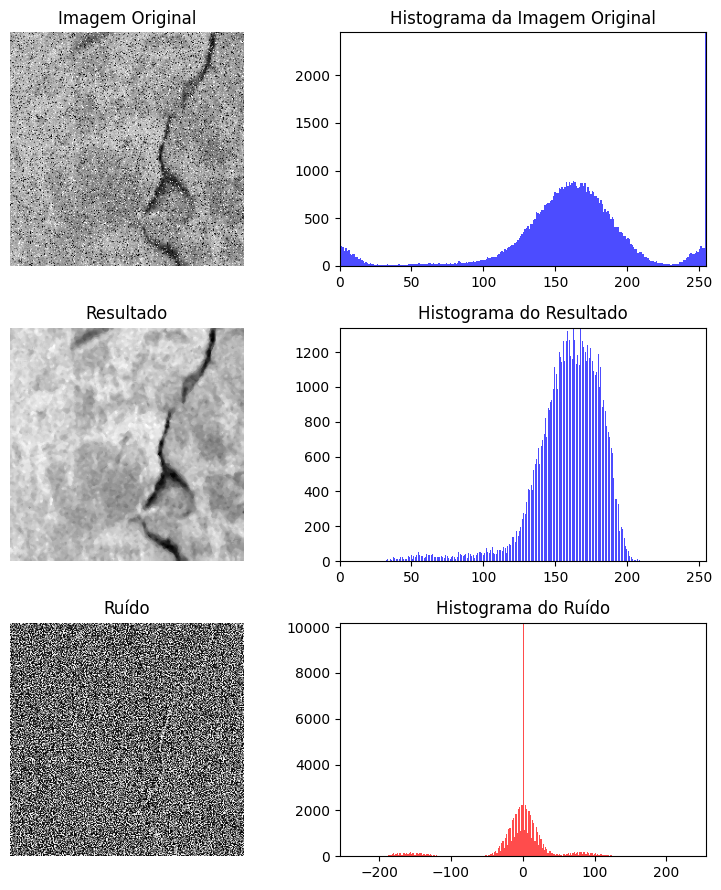

In [ ]:
path_image = "/content/drive/MyDrive/PDI/atividade_5/resultados/noisy_1.jpg"
path_hist = "/content/drive/MyDrive/PDI/atividade_5/resultados_hist/noisy_1.jpg"
imagem_4 = plt.imread("/content/drive/MyDrive/PDI/atividade_5/images/noisy_1.jpg")

imagem_limpa = filtro_mediana(imagem_4,3)
imagem_limpa = filtro_mediana(imagem_limpa,3)

noisy = imagem_4 - imagem_limpa

resultado_ssim = ssim(imagem_4, imagem_limpa)
psnr = calculate_psnr(imagem_4,imagem_limpa)

print(f"O PSNR das imagens é de: {psnr}")
print(f"O SSIM entre as imagens é de: {resultado_ssim}")

plot_imagens_histogramas_3(imagem_4,imagem_limpa,noisy,path_image,path_hist)

**Noisy_2:** Aplicamos o método `filtro_mediana()` com `janela = 3` duas vezes para obtermos melhores resultados.

O PSNR das imagens é de: 16.867693928373736
O SSIM entre as imagens é de: 0.13668413980280358


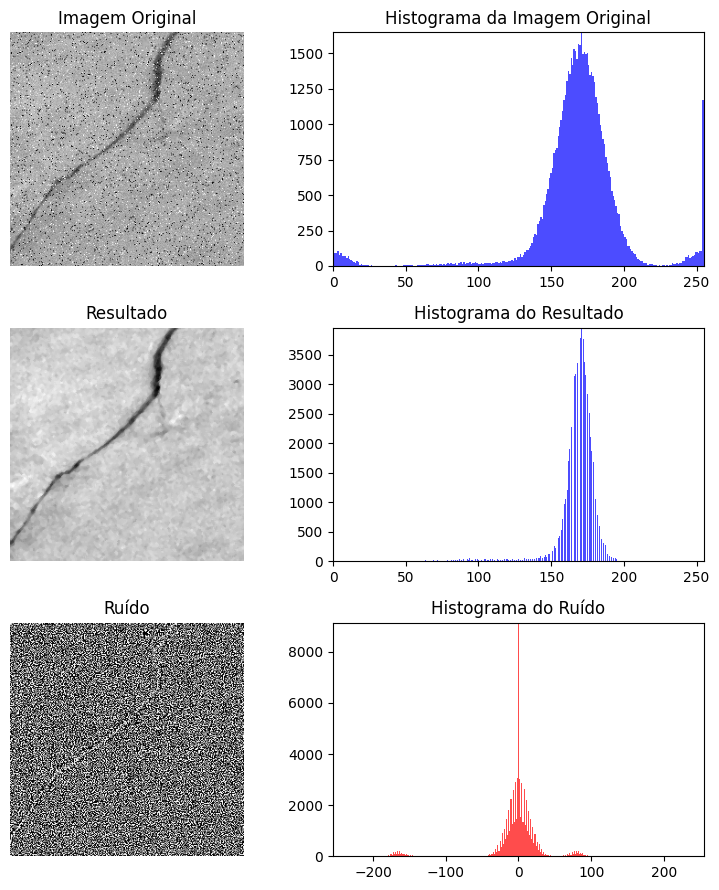

In [ ]:
path_image = "/content/drive/MyDrive/PDI/atividade_5/resultados/noisy_2.jpg"
path_hist = "/content/drive/MyDrive/PDI/atividade_5/resultados_hist/noisy_2.jpg"

imagem_5 = plt.imread("/content/drive/MyDrive/PDI/atividade_5/images/noisy_2.jpg")

imagem_limpa = filtro_mediana(imagem_5,3)
imagem_limpa = filtro_mediana(imagem_limpa,3)

noisy = imagem_5 - imagem_limpa

resultado_ssim = ssim(imagem_5, imagem_limpa)
psnr = calculate_psnr(imagem_5,imagem_limpa)

print(f"O PSNR das imagens é de: {psnr}")
print(f"O SSIM entre as imagens é de: {resultado_ssim}")

plot_imagens_histogramas_3(imagem_5,imagem_limpa,noisy,path_image,path_hist)

**Noisy_3:** Aplicamos o método `remover_ruido_gaussiano` com `media = 2`,`desvio=12` e `tolerancia=23`, em seguida aplicamos o método `filtro_media() `para obtermos melhores resultados.

O PSNR das imagens é de: 20.04058449165204
O SSIM entre as imagens é de: 0.5136884554999778


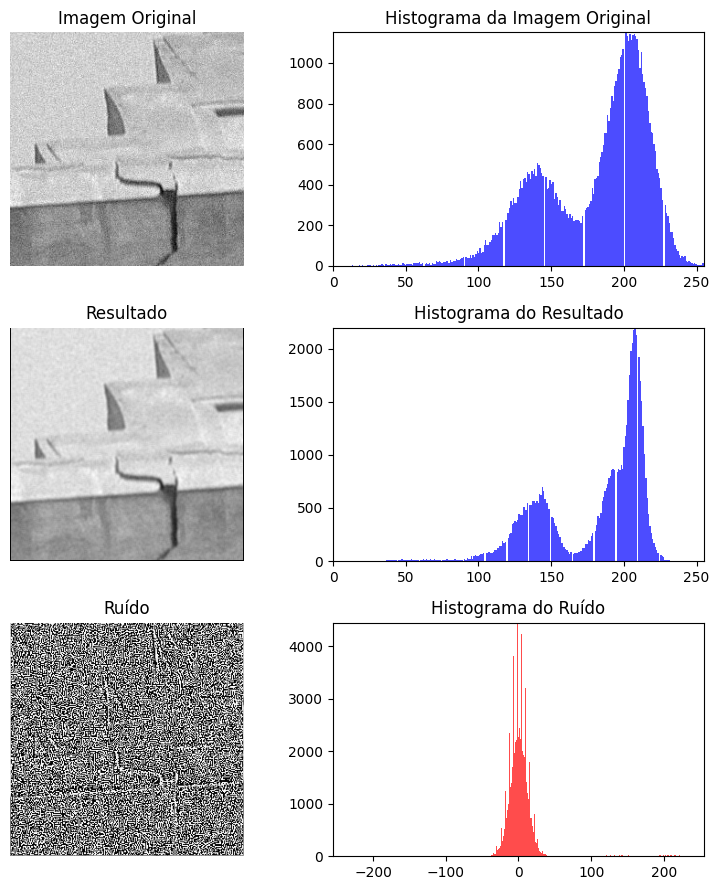

In [ ]:
path_image = "/content/drive/MyDrive/PDI/atividade_5/resultados/noisy_3.jpg"
path_hist = "/content/drive/MyDrive/PDI/atividade_5/resultados_hist/noisy_3.jpg"

imagem_6 = plt.imread("/content/drive/MyDrive/PDI/atividade_5/images/noisy_3.jpg")

imagem_limpa = remover_ruido_gaussiano(imagem_6,2,12,23)
imagem_limpa = filtro_media(imagem_limpa,3)

noisy = imagem_6 - imagem_limpa

resultado_ssim = ssim(imagem_6, imagem_limpa)
psnr = calculate_psnr(imagem_6,imagem_limpa)

print(f"O PSNR das imagens é de: {psnr}")
print(f"O SSIM entre as imagens é de: {resultado_ssim}")

plot_imagens_histogramas_3(imagem_6,imagem_limpa,noisy,path_image,path_hist)

**Noisy_3:** Aplicamos o método `remover_ruido_gaussiano` com `media = 10`,`desvio=13` e `tolerancia=23`, em seguida aplicamos o método `filtro_media() `para obtermos melhores resultados.

O PSNR das imagens é de: 20.73632229491463
O SSIM entre as imagens é de: 0.3862705860313225


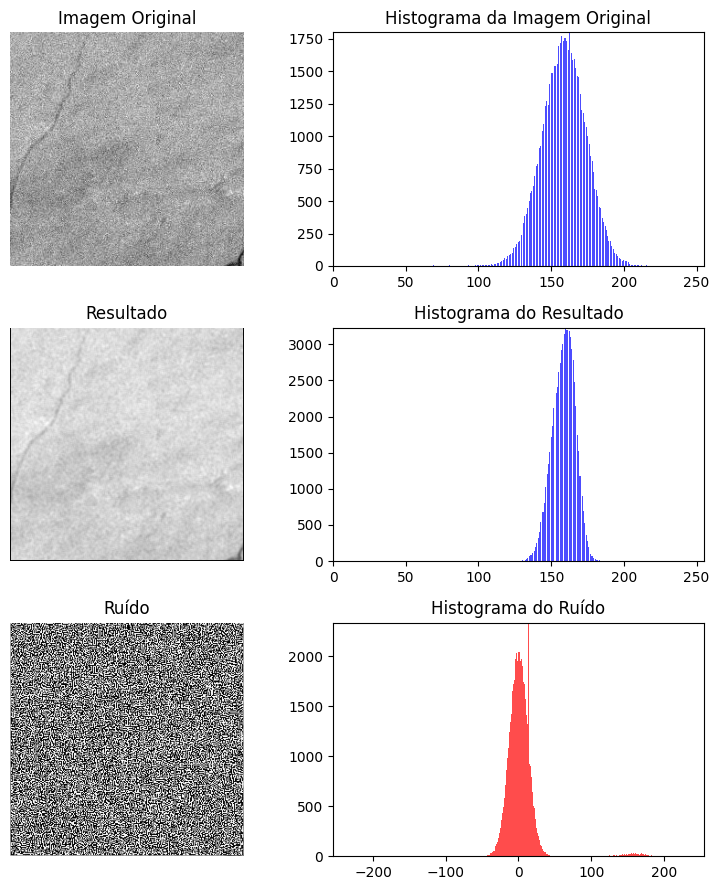

In [ ]:
path_image = "/content/drive/MyDrive/PDI/atividade_5/resultados/noisy_4.jpg"
path_hist = "/content/drive/MyDrive/PDI/atividade_5/resultados_hist/noisy_4.jpg"

imagem_7 = plt.imread("/content/drive/MyDrive/PDI/atividade_5/images/noisy_4.jpg")

imagem_limpa = remover_ruido_gaussiano(imagem_7,10,13,23)
imagem_limpa = filtro_media(imagem_limpa,3)

noisy = imagem_7 - imagem_limpa

resultado_ssim = ssim(imagem_7, imagem_limpa)
psnr = calculate_psnr(imagem_7,imagem_limpa)

print(f"O PSNR das imagens é de: {psnr}")
print(f"O SSIM entre as imagens é de: {resultado_ssim}")

plot_imagens_histogramas_3(imagem_7,imagem_limpa,noisy,path_image,path_hist)